# GCP Data Compression Examples using Python


This notebook demonstrates how to apply **data compression in Google Cloud Platform (GCP)** using Python.  
We'll cover:

1. Compressing local files using **GZIP** and **Snappy**
2. Uploading compressed files to **Google Cloud Storage**
3. Loading compressed files into **BigQuery**
4. Writing **Parquet files** with Snappy compression
5. Benchmarking compression ratios


## GZIP Compression (Local File + Upload to GCS)

In [ ]:

import gzip
import shutil
from google.cloud import storage

SERVICE_ACCOUNT_KEY_FILE = "SA.json"
# Compress local file
with open("data.csv", "rb") as f_in:
    with gzip.open("data.csv.gz", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)


# Upload to GCS
client = storage.Client.from_service_account_json(SERVICE_ACCOUNT_KEY_FILE)

bucket = client.bucket("your-bucket")
blob = bucket.blob("data/data.csv.gz")


blob.upload_from_filename("data.csv.gz")

print("Uploaded compressed file to GCS")


Uploaded compressed file to GCS


##  Load GZIP File into BigQuery

In [ ]:

from google.cloud import bigquery

bq_client = bigquery.Client.from_service_account_json(SERVICE_ACCOUNT_KEY_FILE)

job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,
    autodetect=True,
    skip_leading_rows=1,
)

uri = "gs://your-bucket/data/data.csv.gz"
table_id = "your_dataset.compressed_table"



load_job = bq_client.load_table_from_uri(uri, table_id, job_config=job_config)
load_job.result()

print("Loaded compressed data into BigQuery")


Loaded compressed data into BigQuery


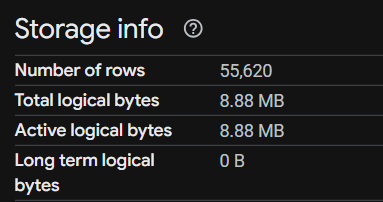

##  Write Parquet with Snappy Compression

In [5]:

import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

df = pd.read_csv("data.csv")

table = pa.Table.from_pandas(df)
pq.write_table(table, "data_snappy.parquet", compression="SNAPPY")

print("Created Snappy-compressed Parquet file")


Created Snappy-compressed Parquet file


## Benchmark Compression Ratios

In [4]:

import os

files = ["data.csv", "data.csv.gz", "data_snappy.parquet"]
for f in files:
    if os.path.exists(f):
        print(f"{f}: {os.path.getsize(f) / 1024:.2f} KB")
    else:
        print(f"{f}: File not found (create it before benchmarking)")


data.csv: 8589.62 KB
data.csv.gz: 396.50 KB
data_snappy.parquet: 196.94 KB



---
### 
- Use **Snappy** for streaming and **GZIP/ZSTD** for archival storage.  
- Combine **Parquet + Snappy** for best performance in **BigQuery** and **Dataflow**.  
- Compress intermediate ETL data to reduce network I/O.  
